In [3]:
import json
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
data_arxiv_chatgpt = []
with open('arxiv_chatGPT.jsonl', 'r', encoding='utf-8') as f:
    for line in f:
        item = json.loads(line.strip())
        # Human text = 0, Machine text = 1
        data_arxiv_chatgpt.append({
            'text': item['human_text'],
            'label': 0,
            'source': 'arxiv_chatGPT',
            'prompt': item.get('prompt', ''),
            'model': 'human'
        })
        data_arxiv_chatgpt.append({
            'text': item['machine_text'],
            'label': 1,
            'source': 'arxiv_chatGPT',
            'prompt': item.get('prompt', ''),
            'model': item.get('model', 'gpt-3.5-turbo')
        })

df_arxiv_chatgpt = pd.DataFrame(data_arxiv_chatgpt)
print(f"Loaded arxiv_chatGPT: {len(df_arxiv_chatgpt)} samples")
print(f"Human: {len(df_arxiv_chatgpt[df_arxiv_chatgpt['label'] == 0])}, Machine: {len(df_arxiv_chatgpt[df_arxiv_chatgpt['label'] == 1])}")
df_arxiv_chatgpt.head()

Loaded arxiv_chatGPT: 6000 samples
Human: 3000, Machine: 3000


,text,label,source,prompt,model
0,A rather non-standard quantum representation...,0,arxiv_chatGPT,Generate a 150-220-word abstract for work with...,human
1,"In this paper, we investigate the continuum li...",1,arxiv_chatGPT,Generate a 150-220-word abstract for work with...,gpt-3.5-turbo
2,We discuss the results from the combined IRA...,0,arxiv_chatGPT,Generate a 150-220-word abstract for work with...,human
3,"In this paper, we present the results of our a...",1,arxiv_chatGPT,Generate a 150-220-word abstract for work with...,gpt-3.5-turbo
4,Results from spectroscopic observations of t...,0,arxiv_chatGPT,Generate a 150-220-word abstract for work with...,human


In [5]:
data_arxiv_cohere = []
with open('arxiv_cohere.jsonl', 'r', encoding='utf-8') as f:
    for line in f:
        item = json.loads(line.strip())
        data_arxiv_cohere.append({
            'text': item['human_text'],
            'label': 0,
            'source': 'arxiv_cohere',
            'prompt': item.get('prompt', ''),
            'model': 'human'
        })
        data_arxiv_cohere.append({
            'text': item['machine_text'],
            'label': 1,
            'source': 'arxiv_cohere',
            'prompt': item.get('prompt', ''),
            'model': item.get('model', 'command-xlarge-nightly')
        })

df_arxiv_cohere = pd.DataFrame(data_arxiv_cohere)
print(f"Loaded arxiv_cohere: {len(df_arxiv_cohere)} samples")
print(f"Human: {len(df_arxiv_cohere[df_arxiv_cohere['label'] == 0])}, Machine: {len(df_arxiv_cohere[df_arxiv_cohere['label'] == 1])}")
df_arxiv_cohere.head()

Loaded arxiv_cohere: 6000 samples
Human: 3000, Machine: 3000


,text,label,source,prompt,model
0,A rather non-standard quantum representation...,0,arxiv_cohere,Generate an abstract for work with title: Poly...,human
1,\nWe consider a system of many polymers in sol...,1,arxiv_cohere,Generate an abstract for work with title: Poly...,command-xlarge-nightly
2,We discuss the results from the combined IRA...,0,arxiv_cohere,Generate an abstract for work with title: The ...,human
3,\n\nWe present a catalog of 66 YSOs in the Ser...,1,arxiv_cohere,Generate an abstract for work with title: The ...,command-xlarge-nightly
4,Results from spectroscopic observations of t...,0,arxiv_cohere,Generate an abstract for work with title: Spec...,human


In [6]:
data_german_wiki = []
with open('german_wikipedia.jsonl', 'r', encoding='utf-8') as f:
    for line in f:
        item = json.loads(line.strip())
        data_german_wiki.append({
            'text': item['human_text'],
            'label': 0,
            'source': 'german_wikipedia',
            'prompt': item.get('prompt', ''),
            'model': 'human'
        })
        data_german_wiki.append({
            'text': item['machine_text'],
            'label': 1,
            'source': 'german_wikipedia',
            'prompt': item.get('prompt', ''),
            'model': item.get('model', 'gpt-3.5-turbo')
        })

df_german_wiki = pd.DataFrame(data_german_wiki)
print(f"Loaded german_wikipedia: {len(df_german_wiki)} samples")
print(f"Human: {len(df_german_wiki[df_german_wiki['label'] == 0])}, Machine: {len(df_german_wiki[df_german_wiki['label'] == 1])}")
df_german_wiki.head()

Loaded german_wikipedia: 1000 samples
Human: 500, Machine: 500


,text,label,source,prompt,model
0,Bei der Patrone .400 CorBon handelt es sich um...,0,german_wikipedia,This is a sample German Wikipedia summary sect...,human
1,"Die .400 Corbon ist eine Pistolenpatrone, die ...",1,german_wikipedia,This is a sample German Wikipedia summary sect...,gpt-3.5-turbo
2,Das Buch Genesis (abgekürzt Gen) ist das erste...,0,german_wikipedia,This is a sample German Wikipedia summary sect...,human
3,Mose oder Genesis ist das erste Buch im Alten ...,1,german_wikipedia,This is a sample German Wikipedia summary sect...,gpt-3.5-turbo
4,Die 18. Verleihung der US-amerikanischen Scree...,0,german_wikipedia,This is a sample German Wikipedia summary sect...,human


In [7]:
with open('hewlett.json', 'r', encoding='utf-8') as f:
    hewlett_items = json.load(f)

data_hewlett = []
for item in hewlett_items:
    # Assuming all documents in hewlett are human-written
    data_hewlett.append({
        'text': item['document'],
        'label': 0,
        'source': 'hewlett',
        'prompt': '',
        'model': 'human'
    })

df_hewlett = pd.DataFrame(data_hewlett)
print(f"Loaded hewlett: {len(df_hewlett)} samples")
print(f"Human: {len(df_hewlett[df_hewlett['label'] == 0])}, Machine: {len(df_hewlett[df_hewlett['label'] == 1])}")
df_hewlett.head()

Loaded hewlett: 88 samples
Human: 88, Machine: 0


,text,label,source,prompt,model
0,"Dear editor, I agree with having computers in ...",0,hewlett,,human
1,"School, family, and sports is @CAPS5 my always...",0,hewlett,,human
2,"Dear @CAPS1 of the @ORGANIZATION1, @CAPS2 has ...",0,hewlett,,human
3,Have you ever had the time completely fly by w...,0,hewlett,,human
4,"Dear The @CAPS1 @CAPS2, I belive that computer...",0,hewlett,,human


In [8]:
data_reddit_chatgpt = []
with open('reddit_chatGPT.jsonl', 'r', encoding='utf-8') as f:
    for line in f:
        item = json.loads(line.strip())
        data_reddit_chatgpt.append({
            'text': item['human_text'],
            'label': 0,
            'source': 'reddit_chatGPT',
            'prompt': item.get('prompt', ''),
            'model': 'human'
        })
        data_reddit_chatgpt.append({
            'text': item['machine_text'],
            'label': 1,
            'source': 'reddit_chatGPT',
            'prompt': item.get('prompt', ''),
            'model': item.get('model', 'gpt-3.5-turbo')
        })

df_reddit_chatgpt = pd.DataFrame(data_reddit_chatgpt)
print(f"Loaded reddit_chatGPT: {len(df_reddit_chatgpt)} samples")
print(f"Human: {len(df_reddit_chatgpt[df_reddit_chatgpt['label'] == 0])}, Machine: {len(df_reddit_chatgpt[df_reddit_chatgpt['label'] == 1])}")
df_reddit_chatgpt.head()

Loaded reddit_chatGPT: 6000 samples
Human: 3000, Machine: 3000


,text,label,source,prompt,model
0,Henry died in a joust against the captain of h...,0,reddit_chatGPT,"I will ask you a question. For this question, ...",human
1,"Well, let me tell you, it was quite a tragic e...",1,reddit_chatGPT,"I will ask you a question. For this question, ...",gpt-3.5-turbo
2,"In 1801, James Monroe and Robert R. Livingston...",0,reddit_chatGPT,"I will ask you a question. For this question, ...",human
3,"Well, when America wanted to buy Louisiana fro...",1,reddit_chatGPT,"I will ask you a question. For this question, ...",gpt-3.5-turbo
4,Good question! [I answered this a few years ba...,0,reddit_chatGPT,"I will ask you a question. For this question, ...",human


In [9]:
data_reddit_cohere = []
with open('reddit_cohere.jsonl', 'r', encoding='utf-8') as f:
    for line in f:
        item = json.loads(line.strip())
        data_reddit_cohere.append({
            'text': item['human_text'],
            'label': 0,
            'source': 'reddit_cohere',
            'prompt': item.get('prompt', ''),
            'model': 'human'
        })
        data_reddit_cohere.append({
            'text': item['machine_text'],
            'label': 1,
            'source': 'reddit_cohere',
            'prompt': item.get('prompt', ''),
            'model': item.get('model', 'cohere')
        })

df_reddit_cohere = pd.DataFrame(data_reddit_cohere)
print(f"Loaded reddit_cohere: {len(df_reddit_cohere)} samples")
print(f"Human: {len(df_reddit_cohere[df_reddit_cohere['label'] == 0])}, Machine: {len(df_reddit_cohere[df_reddit_cohere['label'] == 1])}")
df_reddit_cohere.head()

Loaded reddit_cohere: 6000 samples
Human: 3000, Machine: 3000


,text,label,source,prompt,model
0,Henry died in a joust against the captain of h...,0,reddit_cohere,Write a couple of paragraphs of at least 500 c...,human
1,\n\nThe English king Henry II was famously inv...,1,reddit_cohere,Write a couple of paragraphs of at least 500 c...,cohere
2,"In 1801, James Monroe and Robert R. Livingston...",0,reddit_cohere,Write a couple of paragraphs of at least 500 c...,human
3,\n\nThe Louisiana Purchase was a major land de...,1,reddit_cohere,Write a couple of paragraphs of at least 500 c...,cohere
4,Good question! [I answered this a few years ba...,0,reddit_cohere,Write a couple of paragraphs of at least 500 c...,human


In [10]:
with open('toefl.json', 'r', encoding='utf-8') as f:
    toefl_items = json.load(f)

data_toefl = []
for item in toefl_items:
    # Assuming all documents in TOEFL are human-written
    data_toefl.append({
        'text': item['document'],
        'label': 0,
        'source': 'toefl',
        'prompt': '',
        'model': 'human'
    })

df_toefl = pd.DataFrame(data_toefl)
print(f"Loaded toefl: {len(df_toefl)} samples")
print(f"Human: {len(df_toefl[df_toefl['label'] == 0])}, Machine: {len(df_toefl[df_toefl['label'] == 1])}")
df_toefl.head()

Loaded toefl: 91 samples
Human: 91, Machine: 0


,text,label,source,prompt,model
0,"I prefer to cook at home. First of all, it is ...",0,toefl,,human
1,The place I would like to visit most is the ou...,0,toefl,,human
2,I imagine my life ten years in the future to b...,0,toefl,,human
3,"Personally, I would like to say that the schoo...",0,toefl,,human
4,I believe that I will follow my interest. I'm ...,0,toefl,,human


In [11]:
all_datasets = {
    'arxiv_chatGPT': df_arxiv_chatgpt,
    'arxiv_cohere': df_arxiv_cohere,
    'german_wikipedia': df_german_wiki,
    'hewlett': df_hewlett,
    'reddit_chatGPT': df_reddit_chatgpt,
    'reddit_cohere': df_reddit_cohere,
    'toefl': df_toefl
}

print("=== Dataset Overview ===")
total_samples = 0
total_words = 0

for name, df in all_datasets.items():
    human_count = len(df[df['label'] == 0])
    machine_count = len(df[df['label'] == 1])
    avg_char_length = df['text'].str.len().mean()
    
    # Calculate word counts
    df['word_count'] = df['text'].str.split().str.len()
    total_word_count = df['word_count'].sum()
    avg_word_count = df['word_count'].mean()
    
    total_samples += len(df)
    total_words += total_word_count
    
    print(f"{name}:")
    print(f"  Samples: {len(df)} total ({human_count} human, {machine_count} machine)")
    print(f"  Characters: {avg_char_length:.0f} avg per sample")
    print(f"  Words: {total_word_count:,} total, {avg_word_count:.0f} avg per sample")
    print()

print(f"=== TOTALS ===")
print(f"Total samples across all datasets: {total_samples:,}")
print(f"Total words across all datasets: {total_words:,}")
print(f"Average words per sample: {total_words/total_samples:.0f}")

# Note about API rate limits
print(f"\n=== API Rate Limit Analysis ===")
print(f"GPTZero rate limit: 30,000 requests/hour")
print(f"Total samples: {total_samples:,}")
print(f"Time needed at max rate: {total_samples/30000:.1f} hours")
print(f"Recommended rate (to be safe): 1 request/second = 3,600/hour")
print(f"Time needed at safe rate: {total_samples/3600:.1f} hours")

=== Dataset Overview ===
arxiv_chatGPT:
  Samples: 6000 total (3000 human, 3000 machine)
  Characters: 1389 avg per sample
  Words: 1,259,820 total, 210 avg per sample

arxiv_cohere:
  Samples: 6000 total (3000 human, 3000 machine)
  Characters: 1312 avg per sample
  Words: 1,239,604 total, 207 avg per sample

german_wikipedia:
  Samples: 1000 total (500 human, 500 machine)
  Characters: 1783 avg per sample
  Words: 243,174 total, 243 avg per sample

hewlett:
  Samples: 88 total (88 human, 0 machine)
  Characters: 2097 avg per sample
  Words: 33,262 total, 378 avg per sample

reddit_chatGPT:
  Samples: 6000 total (3000 human, 3000 machine)
  Characters: 2191 avg per sample
  Words: 2,195,209 total, 366 avg per sample

reddit_cohere:
  Samples: 6000 total (3000 human, 3000 machine)
  Characters: 1590 avg per sample
  Words: 1,609,221 total, 268 avg per sample

toefl:
  Samples: 91 total (91 human, 0 machine)
  Characters: 578 avg per sample
  Words: 9,748 total, 107 avg per sample

=== 

In [12]:
sample_arxiv_chatgpt = df_arxiv_chatgpt.sample(n=min(20, len(df_arxiv_chatgpt)), random_state=42)
sample_arxiv_cohere = df_arxiv_cohere.sample(n=min(20, len(df_arxiv_cohere)), random_state=42)
sample_german_wiki = df_german_wiki.sample(n=min(20, len(df_german_wiki)), random_state=42)
sample_hewlett = df_hewlett.sample(n=min(20, len(df_hewlett)), random_state=42)
sample_reddit_chatgpt = df_reddit_chatgpt.sample(n=min(20, len(df_reddit_chatgpt)), random_state=42)
sample_reddit_cohere = df_reddit_cohere.sample(n=min(20, len(df_reddit_cohere)), random_state=42)
sample_toefl = df_toefl.sample(n=min(20, len(df_toefl)), random_state=42)

print("Created samples:")
print(f"arxiv_chatGPT sample: {len(sample_arxiv_chatgpt)}")
print(f"arxiv_cohere sample: {len(sample_arxiv_cohere)}")
print(f"german_wikipedia sample: {len(sample_german_wiki)}")
print(f"hewlett sample: {len(sample_hewlett)}")
print(f"reddit_chatGPT sample: {len(sample_reddit_chatgpt)}")
print(f"reddit_cohere sample: {len(sample_reddit_cohere)}")
print(f"toefl sample: {len(sample_toefl)}")

Created samples:
arxiv_chatGPT sample: 20
arxiv_cohere sample: 20
german_wikipedia sample: 20
hewlett sample: 20
reddit_chatGPT sample: 20
reddit_cohere sample: 20
toefl sample: 20


In [13]:
sample_arxiv_chatgpt.to_csv('sample_arxiv_chatgpt.csv', index=False)
sample_arxiv_cohere.to_csv('sample_arxiv_cohere.csv', index=False)
sample_german_wiki.to_csv('sample_german_wiki.csv', index=False)
sample_hewlett.to_csv('sample_hewlett.csv', index=False)
sample_reddit_chatgpt.to_csv('sample_reddit_chatgpt.csv', index=False)
sample_reddit_cohere.to_csv('sample_reddit_cohere.csv', index=False)
sample_toefl.to_csv('sample_toefl.csv', index=False)

print("Exported sample CSV files for manual evaluation")

Exported sample CSV files for manual evaluation


In [14]:
combined_samples = []
samples_per_dataset = 100 // len(all_datasets)

for name, df in all_datasets.items():
    if len(df) > 0:
        sample_size = min(samples_per_dataset, len(df))
        dataset_sample = df.sample(n=sample_size, random_state=42)
        combined_samples.append(dataset_sample)

combined_df = pd.concat(combined_samples, ignore_index=True)
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Combined sample: {len(combined_df)} samples")
print("Distribution by source:")
print(combined_df['source'].value_counts())
print("\nDistribution by label:")
print(combined_df['label'].value_counts())

Combined sample: 98 samples
Distribution by source:
source
reddit_chatGPT      14
german_wikipedia    14
toefl               14
arxiv_cohere        14
reddit_cohere       14
hewlett             14
arxiv_chatGPT       14
Name: count, dtype: int64

Distribution by label:
label
0    55
1    43
Name: count, dtype: int64


In [15]:
combined_df.to_csv('combined_sample.csv', index=False)
print("Exported combined_sample.csv")

Exported combined_sample.csv


In [16]:
# For arxiv_chatGPT sample
with open('arxiv_chatgpt_for_dashboard.txt', 'w', encoding='utf-8') as f:
    f.write("=== ARXIV CHATGPT SAMPLES FOR GPTZER ===\n\n")
    for idx, row in sample_arxiv_chatgpt.iterrows():
        f.write(f"--- Document {idx} ---\n")
        f.write(f"True Label: {'Human' if row['label'] == 0 else 'AI'}\n")
        f.write(f"Model: {row['model']}\n")
        f.write(f"Text Length: {len(row['text'])} characters, {len(row['text'].split())} words\n")
        f.write(f"Text: {row['text']}\n")  # Full text, no truncation
        f.write("\n" + "="*80 + "\n\n")

In [17]:
datasets_to_export = {
    'arxiv_cohere': sample_arxiv_cohere,
    'german_wiki': sample_german_wiki,
    'hewlett': sample_hewlett,
    'reddit_chatgpt': sample_reddit_chatgpt,
    'reddit_cohere': sample_reddit_cohere,
    'toefl': sample_toefl
}

for dataset_name, sample_df in datasets_to_export.items():
    filename = f'{dataset_name}_for_dashboard.txt'
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(f"=== {dataset_name.upper()} SAMPLES FOR GPTZER ===\n\n")
        for idx, row in sample_df.iterrows():
            f.write(f"--- Document {idx} ---\n")
            f.write(f"True Label: {'Human' if row['label'] == 0 else 'AI'}\n")
            f.write(f"Model: {row['model']}\n")
            f.write(f"Text Length: {len(row['text'])} characters, {len(row['text'].split())} words\n")
            f.write(f"Text: {row['text']}\n")  # Full text, no truncation
            f.write("\n" + "="*80 + "\n\n")
    print(f"Created {filename}")

print("\n  IMPORTANT: All texts are now exported in FULL (no truncation)")
print("This is crucial for accurate GPTZero evaluation!")
print("Some texts may be very long - this is intentional and necessary.")

Created arxiv_cohere_for_dashboard.txt
Created german_wiki_for_dashboard.txt
Created hewlett_for_dashboard.txt
Created reddit_chatgpt_for_dashboard.txt
Created reddit_cohere_for_dashboard.txt
Created toefl_for_dashboard.txt

  IMPORTANT: All texts are now exported in FULL (no truncation)
This is crucial for accurate GPTZero evaluation!
Some texts may be very long - this is intentional and necessary.


In [18]:
results_template = []
for dataset_name, sample_df in [('arxiv_chatgpt', sample_arxiv_chatgpt)] + list(datasets_to_export.items()):
    for idx, row in sample_df.iterrows():
        results_template.append({
            'dataset': dataset_name,
            'document_id': idx,
            'true_label': row['label'],
            'true_label_text': 'Human' if row['label'] == 0 else 'AI',
            'model': row['model'],
            'text_length': len(row['text']),
            'gptzer_probability': '',  # To be filled manually
            'gptzer_prediction': '',   # To be filled manually (0 for Human, 1 for AI)
            'notes': ''
        })

results_template_df = pd.DataFrame(results_template)
results_template_df.to_csv('gptzer_results_template.csv', index=False)
print(f"Created results template with {len(results_template_df)} rows")

Created results template with 140 rows


In [19]:
# Special handling for reddit_cohere - filter out texts under 250 characters
reddit_cohere_long = df_reddit_cohere[df_reddit_cohere['text'].str.len() >= 250]
print(f"reddit_cohere: {len(df_reddit_cohere)} total samples, {len(reddit_cohere_long)} samples ≥250 chars")

if len(reddit_cohere_long) >= 20:
    sample_reddit_cohere = reddit_cohere_long.sample(n=20, random_state=42)
else:
    sample_reddit_cohere = reddit_cohere_long.sample(n=len(reddit_cohere_long), random_state=42)
    print(f" Warning: Only {len(sample_reddit_cohere)} reddit_cohere samples meet 250+ character requirement")

reddit_cohere: 6000 total samples, 4174 samples ≥250 chars


In [20]:
datasets_to_export = {
    'reddit_cohere': sample_reddit_cohere,
}

for dataset_name, sample_df in datasets_to_export.items():
    filename = f'{dataset_name}1_for_dashboard.txt'
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(f"=== {dataset_name.upper()} SAMPLES FOR GPTZER ===\n\n")
        for idx, row in sample_df.iterrows():
            f.write(f"--- Document {idx} ---\n")
            f.write(f"True Label: {'Human' if row['label'] == 0 else 'AI'}\n")
            f.write(f"Model: {row['model']}\n")
            f.write(f"Text Length: {len(row['text'])} characters, {len(row['text'].split())} words\n")
            f.write(f"Text: {row['text']}\n")  # Full text, no truncation
            f.write("\n" + "="*80 + "\n\n")
    print(f"Created {filename}")

Created reddit_cohere1_for_dashboard.txt


In [22]:
# Cell 17: Calculate metrics (to be run after manual evaluation)
# Load your manually filled results
results_df = pd.read_csv('gptzer_results_template.csv')

# Calculate overall metrics
def calculate_overall_metrics(results_df):
    # Remove rows where predictions are missing
    valid_results = results_df.dropna(subset=['gptzer_prediction'])
    
    y_true = valid_results['true_label'].tolist()
    y_pred = valid_results['gptzer_prediction'].tolist()
    
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1_score': f1_score(y_true, y_pred, average='weighted'),
        'precision_human': precision_score(y_true, y_pred, pos_label=0),
        'recall_human': recall_score(y_true, y_pred, pos_label=0),
        'f1_human': f1_score(y_true, y_pred, pos_label=0),
        'precision_ai': precision_score(y_true, y_pred, pos_label=1),
        'recall_ai': recall_score(y_true, y_pred, pos_label=1),
        'f1_ai': f1_score(y_true, y_pred, pos_label=1)
    }
    
    return metrics

In [23]:
# Cell 18: Calculate per-dataset metrics (to be run after manual evaluation)
def calculate_per_dataset_metrics(results_df):
    dataset_metrics = {}
    
    for dataset in results_df['dataset'].unique():
        dataset_results = results_df[results_df['dataset'] == dataset]
        valid_results = dataset_results.dropna(subset=['gptzer_prediction'])
        
        if len(valid_results) > 0:
            y_true = valid_results['true_label'].tolist()
            y_pred = valid_results['gptzer_prediction'].tolist()
            
            dataset_metrics[dataset] = {
                'accuracy': accuracy_score(y_true, y_pred),
                'precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
                'recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
                'f1_score': f1_score(y_true, y_pred, average='weighted', zero_division=0),
                'sample_size': len(valid_results)
            }
    
    return dataset_metrics

In [24]:
# Cell 19: Plot confusion matrix (to be run after manual evaluation)
def plot_confusion_matrix_for_results(results_df, title="GPTZero Performance"):
    valid_results = results_df.dropna(subset=['gptzer_prediction'])
    y_true = valid_results['true_label'].tolist()
    y_pred = valid_results['gptzer_prediction'].tolist()
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Human', 'AI'], 
                yticklabels=['Human', 'AI'])
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return cm

In [25]:
print(f"Loaded {len(results_df)} valid results")
print("Distribution by dataset:")
print(results_df['dataset'].value_counts())
print("\nDistribution by true labels:")
print(results_df['true_label'].value_counts())

Loaded 140 valid results
Distribution by dataset:
dataset
arxiv_chatgpt     20
arxiv_cohere      20
german_wiki       20
hewlett           20
reddit_chatgpt    20
reddit_cohere     20
toefl             20
Name: count, dtype: int64

Distribution by true labels:
true_label
0    78
1    62
Name: count, dtype: int64


In [26]:
print("=== OVERALL PERFORMANCE ACROSS ALL DATASETS ===")

y_true_overall = results_df['true_label'].tolist()
y_pred_overall = results_df['gptzer_prediction'].tolist()

overall_accuracy = accuracy_score(y_true_overall, y_pred_overall)
overall_precision = precision_score(y_true_overall, y_pred_overall, average='weighted', zero_division=0)
overall_recall = recall_score(y_true_overall, y_pred_overall, average='weighted', zero_division=0)
overall_f1 = f1_score(y_true_overall, y_pred_overall, average='weighted', zero_division=0)

# Per-class metrics
overall_precision_human = precision_score(y_true_overall, y_pred_overall, pos_label=0, zero_division=0)
overall_recall_human = recall_score(y_true_overall, y_pred_overall, pos_label=0, zero_division=0)
overall_f1_human = f1_score(y_true_overall, y_pred_overall, pos_label=0, zero_division=0)

overall_precision_ai = precision_score(y_true_overall, y_pred_overall, pos_label=1, zero_division=0)
overall_recall_ai = recall_score(y_true_overall, y_pred_overall, pos_label=1, zero_division=0)
overall_f1_ai = f1_score(y_true_overall, y_pred_overall, pos_label=1, zero_division=0)

print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1-Score: {overall_f1:.4f}")
print()
print("Per-Class Performance:")
print(f"Human Detection - Precision: {overall_precision_human:.4f}, Recall: {overall_recall_human:.4f}, F1: {overall_f1_human:.4f}")
print(f"AI Detection - Precision: {overall_precision_ai:.4f}, Recall: {overall_recall_ai:.4f}, F1: {overall_f1_ai:.4f}")


=== OVERALL PERFORMANCE ACROSS ALL DATASETS ===
Overall Accuracy: 0.8714
Overall Precision: 0.8806
Overall Recall: 0.8714
Overall F1-Score: 0.8691

Per-Class Performance:
Human Detection - Precision: 0.8333, Recall: 0.9615, F1: 0.8929
AI Detection - Precision: 0.9400, Recall: 0.7581, F1: 0.8393


In [27]:
print("\n" + "="*60)
print("ARXIV_CHATGPT DATASET PERFORMANCE")
print("="*60)

arxiv_chatgpt_results = results_df[results_df['dataset'] == 'arxiv_chatgpt']
if len(arxiv_chatgpt_results) > 0:
    y_true = arxiv_chatgpt_results['true_label'].tolist()
    y_pred = arxiv_chatgpt_results['gptzer_prediction'].tolist()
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    print(f"Sample Size: {len(arxiv_chatgpt_results)}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Human', 'AI'], zero_division=0))
else:
    print("No results found for arxiv_chatgpt dataset")



ARXIV_CHATGPT DATASET PERFORMANCE
Sample Size: 20
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

       Human       1.00      1.00      1.00         6
          AI       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [28]:
print("\n" + "="*60)
print("ARXIV_COHERE DATASET PERFORMANCE")
print("="*60)

arxiv_cohere_results = results_df[results_df['dataset'] == 'arxiv_cohere']
if len(arxiv_cohere_results) > 0:
    y_true = arxiv_cohere_results['true_label'].tolist()
    y_pred = arxiv_cohere_results['gptzer_prediction'].tolist()
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    print(f"Sample Size: {len(arxiv_cohere_results)}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Human', 'AI'], zero_division=0))
else:
    print("No results found for arxiv_cohere dataset")



ARXIV_COHERE DATASET PERFORMANCE
Sample Size: 20
Accuracy: 0.7500
Precision: 0.8636
Recall: 0.7500
F1-Score: 0.7596

Classification Report:
              precision    recall  f1-score   support

       Human       0.55      1.00      0.71         6
          AI       1.00      0.64      0.78        14

    accuracy                           0.75        20
   macro avg       0.77      0.82      0.74        20
weighted avg       0.86      0.75      0.76        20



In [29]:
print("\n" + "="*60)
print("GERMAN_WIKI DATASET PERFORMANCE")
print("="*60)

german_wiki_results = results_df[results_df['dataset'] == 'german_wiki']
if len(german_wiki_results) > 0:
    y_true = german_wiki_results['true_label'].tolist()
    y_pred = german_wiki_results['gptzer_prediction'].tolist()
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    print(f"Sample Size: {len(german_wiki_results)}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Human', 'AI'], zero_division=0))
else:
    print("No results found for german_wiki dataset")



GERMAN_WIKI DATASET PERFORMANCE
Sample Size: 20
Accuracy: 0.7500
Precision: 0.8393
Recall: 0.7500
F1-Score: 0.7404

Classification Report:
              precision    recall  f1-score   support

       Human       0.64      1.00      0.78         9
          AI       1.00      0.55      0.71        11

    accuracy                           0.75        20
   macro avg       0.82      0.77      0.74        20
weighted avg       0.84      0.75      0.74        20



In [30]:
print("\n" + "="*60)
print("HEWLETT DATASET PERFORMANCE")
print("="*60)

hewlett_results = results_df[results_df['dataset'] == 'hewlett']
if len(hewlett_results) > 0:
    y_true = hewlett_results['true_label'].tolist()
    y_pred = hewlett_results['gptzer_prediction'].tolist()
    
    # Note: Hewlett is all human text, so AI detection metrics may not apply
    accuracy = accuracy_score(y_true, y_pred)
    
    print(f"Sample Size: {len(hewlett_results)}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Note: Hewlett dataset contains only human text")
    
    # Count how many were correctly identified as human
    correct_human = sum(1 for true, pred in zip(y_true, y_pred) if true == 0 and pred == 0)
    false_positive_ai = sum(1 for true, pred in zip(y_true, y_pred) if true == 0 and pred == 1)
    
    print(f"Correctly identified as Human: {correct_human}/{len(hewlett_results)} ({correct_human/len(hewlett_results)*100:.1f}%)")
    print(f"Incorrectly flagged as AI: {false_positive_ai}/{len(hewlett_results)} ({false_positive_ai/len(hewlett_results)*100:.1f}%)")
else:
    print("No results found for hewlett dataset")



HEWLETT DATASET PERFORMANCE
Sample Size: 20
Accuracy: 1.0000
Note: Hewlett dataset contains only human text
Correctly identified as Human: 20/20 (100.0%)
Incorrectly flagged as AI: 0/20 (0.0%)


In [31]:
print("\n" + "="*60)
print("REDDIT_CHATGPT DATASET PERFORMANCE")
print("="*60)

reddit_chatgpt_results = results_df[results_df['dataset'] == 'reddit_chatgpt']
if len(reddit_chatgpt_results) > 0:
    y_true = reddit_chatgpt_results['true_label'].tolist()
    y_pred = reddit_chatgpt_results['gptzer_prediction'].tolist()
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    print(f"Sample Size: {len(reddit_chatgpt_results)}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Human', 'AI'], zero_division=0))
else:
    print("No results found for reddit_chatgpt dataset")



REDDIT_CHATGPT DATASET PERFORMANCE
Sample Size: 20
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

       Human       1.00      1.00      1.00         6
          AI       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [32]:
print("\n" + "="*60)
print("REDDIT_COHERE DATASET PERFORMANCE")
print("="*60)

reddit_cohere_results = results_df[results_df['dataset'] == 'reddit_cohere']
if len(reddit_cohere_results) > 0:
    y_true = reddit_cohere_results['true_label'].tolist()
    y_pred = reddit_cohere_results['gptzer_prediction'].tolist()
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    print(f"Sample Size: {len(reddit_cohere_results)}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Human', 'AI'], zero_division=0))
else:
    print("No results found for reddit_cohere dataset")



REDDIT_COHERE DATASET PERFORMANCE
Sample Size: 20
Accuracy: 0.7500
Precision: 0.8281
Recall: 0.7500
F1-Score: 0.7251

Classification Report:
              precision    recall  f1-score   support

       Human       0.69      1.00      0.81        11
          AI       1.00      0.44      0.62         9

    accuracy                           0.75        20
   macro avg       0.84      0.72      0.72        20
weighted avg       0.83      0.75      0.73        20



In [33]:
print("\n" + "="*60)
print("TOEFL DATASET PERFORMANCE")
print("="*60)

toefl_results = results_df[results_df['dataset'] == 'toefl']
if len(toefl_results) > 0:
    y_true = toefl_results['true_label'].tolist()
    y_pred = toefl_results['gptzer_prediction'].tolist()
    
    # Note: TOEFL is all human text, so AI detection metrics may not apply
    accuracy = accuracy_score(y_true, y_pred)
    
    print(f"Sample Size: {len(toefl_results)}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Note: TOEFL dataset contains only human text")
    
    # Count how many were correctly identified as human
    correct_human = sum(1 for true, pred in zip(y_true, y_pred) if true == 0 and pred == 0)
    false_positive_ai = sum(1 for true, pred in zip(y_true, y_pred) if true == 0 and pred == 1)
    
    print(f"Correctly identified as Human: {correct_human}/{len(toefl_results)} ({correct_human/len(toefl_results)*100:.1f}%)")
    print(f"Incorrectly flagged as AI: {false_positive_ai}/{len(toefl_results)} ({false_positive_ai/len(toefl_results)*100:.1f}%)")
else:
    print("No results found for toefl dataset")



TOEFL DATASET PERFORMANCE
Sample Size: 20
Accuracy: 0.8500
Note: TOEFL dataset contains only human text
Correctly identified as Human: 17/20 (85.0%)
Incorrectly flagged as AI: 3/20 (15.0%)



OVERALL CONFUSION MATRIX


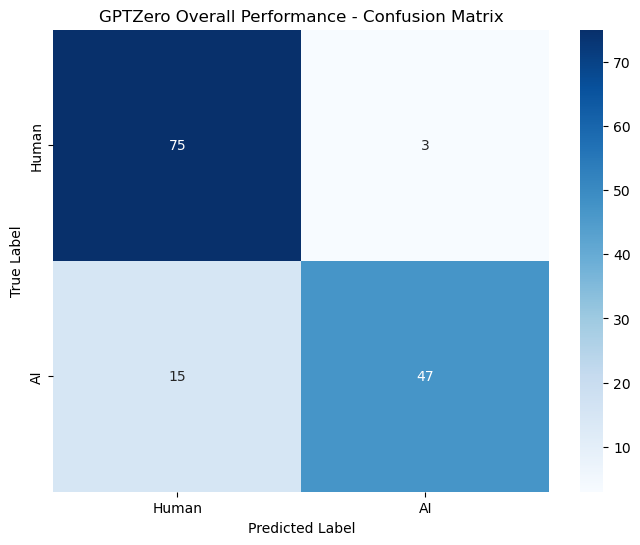

Confusion Matrix Values:
True Negatives (Human→Human): 75
False Positives (Human→AI): 3
False Negatives (AI→Human): 15
True Positives (AI→AI): 47


In [34]:
print("\n" + "="*60)
print("OVERALL CONFUSION MATRIX")
print("="*60)

y_true_overall = results_df['true_label'].tolist()
y_pred_overall = results_df['gptzer_prediction'].tolist()

cm_overall = confusion_matrix(y_true_overall, y_pred_overall)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_overall, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Human', 'AI'], 
            yticklabels=['Human', 'AI'])
plt.title('GPTZero Overall Performance - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("Confusion Matrix Values:")
print(f"True Negatives (Human→Human): {cm_overall[0,0]}")
print(f"False Positives (Human→AI): {cm_overall[0,1]}")
print(f"False Negatives (AI→Human): {cm_overall[1,0]}")
print(f"True Positives (AI→AI): {cm_overall[1,1]}")


In [35]:
print("\n" + "="*60)
print("PERFORMANCE COMPARISON ACROSS DATASETS")
print("="*60)

dataset_comparison = []
for dataset_name in results_df['dataset'].unique():
    dataset_results = results_df[results_df['dataset'] == dataset_name]
    if len(dataset_results) > 0:
        y_true = dataset_results['true_label'].tolist()
        y_pred = dataset_results['gptzer_prediction'].tolist()
        
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
        
        dataset_comparison.append({
            'Dataset': dataset_name,
            'Sample_Size': len(dataset_results),
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1_Score': f1
        })

comparison_df = pd.DataFrame(dataset_comparison)
print(comparison_df.round(4))



PERFORMANCE COMPARISON ACROSS DATASETS
          Dataset  Sample_Size  Accuracy  Precision  Recall  F1_Score
0   arxiv_chatgpt           20      1.00     1.0000    1.00    1.0000
1    arxiv_cohere           20      0.75     0.8636    0.75    0.7596
2     german_wiki           20      0.75     0.8393    0.75    0.7404
3         hewlett           20      1.00     1.0000    1.00    1.0000
4  reddit_chatgpt           20      1.00     1.0000    1.00    1.0000
5   reddit_cohere           20      0.75     0.8281    0.75    0.7251
6           toefl           20      0.85     1.0000    0.85    0.9189


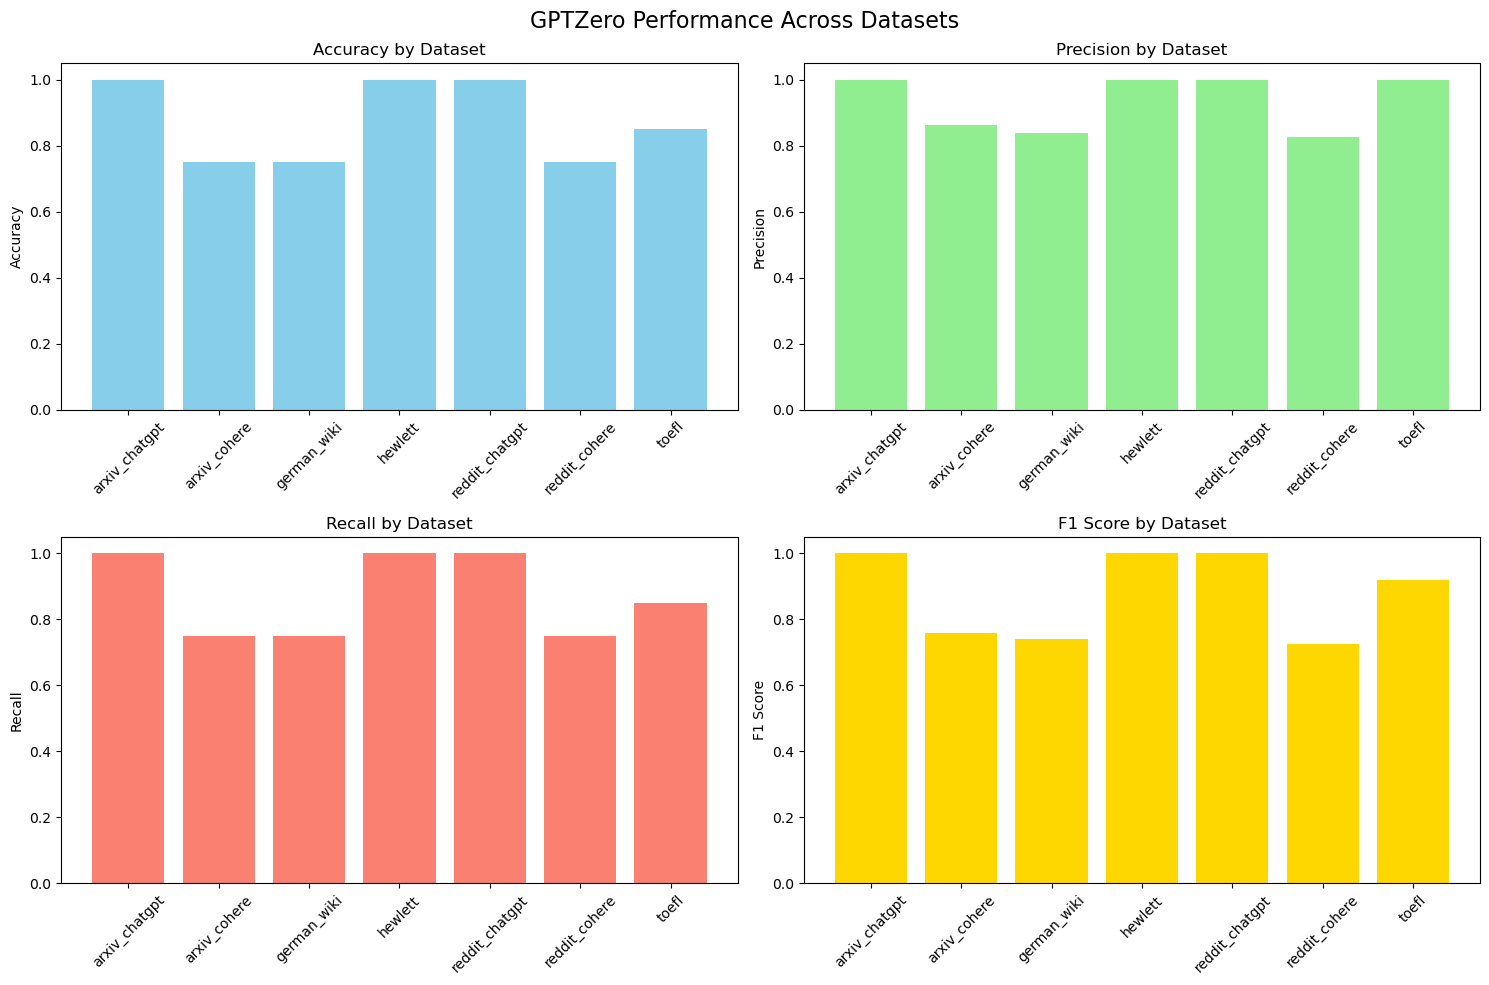

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('GPTZero Performance Across Datasets', fontsize=16)

# Accuracy
axes[0,0].bar(comparison_df['Dataset'], comparison_df['Accuracy'], color='skyblue')
axes[0,0].set_title('Accuracy by Dataset')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)

# Precision
axes[0,1].bar(comparison_df['Dataset'], comparison_df['Precision'], color='lightgreen')
axes[0,1].set_title('Precision by Dataset')
axes[0,1].set_ylabel('Precision')
axes[0,1].tick_params(axis='x', rotation=45)

# Recall
axes[1,0].bar(comparison_df['Dataset'], comparison_df['Recall'], color='salmon')
axes[1,0].set_title('Recall by Dataset')
axes[1,0].set_ylabel('Recall')
axes[1,0].tick_params(axis='x', rotation=45)

# F1 Score
axes[1,1].bar(comparison_df['Dataset'], comparison_df['F1_Score'], color='gold')
axes[1,1].set_title('F1 Score by Dataset')
axes[1,1].set_ylabel('F1 Score')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [37]:
print("\n" + "="*60)
print("SUMMARY STATISTICS AND INSIGHTS")
print("="*60)

print("Dataset Performance Summary:")
print(f"Best performing dataset (F1): {comparison_df.loc[comparison_df['F1_Score'].idxmax(), 'Dataset']} ({comparison_df['F1_Score'].max():.4f})")
print(f"Worst performing dataset (F1): {comparison_df.loc[comparison_df['F1_Score'].idxmin(), 'Dataset']} ({comparison_df['F1_Score'].min():.4f})")
print(f"Average accuracy across datasets: {comparison_df['Accuracy'].mean():.4f}")
print(f"Standard deviation of accuracy: {comparison_df['Accuracy'].std():.4f}")

print(f"\nOverall Performance:")
print(f"Total samples evaluated: {len(results_df)}")
print(f"Overall accuracy: {overall_accuracy:.4f}")
print(f"Overall F1-score: {overall_f1:.4f}")

# Human-only datasets analysis
human_only_datasets = []
mixed_datasets = []

for dataset_name in results_df['dataset'].unique():
    dataset_results = results_df[results_df['dataset'] == dataset_name]
    unique_labels = dataset_results['true_label'].unique()
    
    if len(unique_labels) == 1 and unique_labels[0] == 0:
        human_only_datasets.append(dataset_name)
    else:
        mixed_datasets.append(dataset_name)

if human_only_datasets:
    print(f"\nHuman-only datasets: {human_only_datasets}")
    print("These datasets test GPTZero's false positive rate (incorrectly flagging human text as AI)")

if mixed_datasets:
    print(f"\nMixed datasets (Human + AI): {mixed_datasets}")
    print("These datasets test GPTZero's overall classification ability")

print(f"\n" + "="*60)
print("EVALUATION COMPLETE!")
print("="*60)


SUMMARY STATISTICS AND INSIGHTS
Dataset Performance Summary:
Best performing dataset (F1): arxiv_chatgpt (1.0000)
Worst performing dataset (F1): reddit_cohere (0.7251)
Average accuracy across datasets: 0.8714
Standard deviation of accuracy: 0.1254

Overall Performance:
Total samples evaluated: 140
Overall accuracy: 0.8714
Overall F1-score: 0.8691

Human-only datasets: ['hewlett', 'toefl']
These datasets test GPTZero's false positive rate (incorrectly flagging human text as AI)

Mixed datasets (Human + AI): ['arxiv_chatgpt', 'arxiv_cohere', 'german_wiki', 'reddit_chatgpt', 'reddit_cohere']
These datasets test GPTZero's overall classification ability

EVALUATION COMPLETE!
